# LAB 1

## warm up

In [1]:
from keras.datasets import fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
training_images[3].shape

(28, 28)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# You can put between 0 to 59999 here
index = 3

# Set number of characters per row when printing
np.set_printoptions(linewidth=28*28)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

LABEL: 3

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194 102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179 186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152 148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140 137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131 131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119 140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117 127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119 127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 129 112 

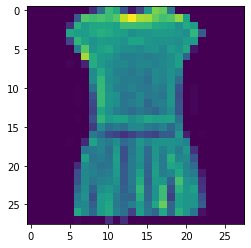

In [11]:
plt.imshow(training_images[index])

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called normalization and fortunately in Python, it's easy to normalize an array without looping. You do it like this

In [12]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [14]:
# Build the classification model
from keras.layers import Dense, Flatten
from keras import Sequential
model = Sequential([Flatten(),Dense(128, activation='relu'), Dense(10, activation='softmax')])

In [15]:
# Declare sample inputs and convert to a tensor
import tensorflow as tf
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]


In [16]:
# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

sum of outputs: 1.0
class with highest probability: 2


In [17]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 844us/step - loss: 0.4951 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 2s 826us/step - loss: 0.3702 - accuracy: 0.8669
Epoch 3/5
1875/1875 [==============================] - 1s 788us/step - loss: 0.3322 - accuracy: 0.8788
Epoch 4/5
1875/1875 [==============================] - 2s 808us/step - loss: 0.3108 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 2s 867us/step - loss: 0.2929 - accuracy: 0.8923


In [18]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 721us/step - loss: 0.3499 - accuracy: 0.8727


[0.34988150000572205, 0.8726999759674072]

## Exercise 1:

In [22]:
classification = model.predict(test_images)


In [24]:
print("The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value\n")
print(classification[0])

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value

[6.9696049e-05 1.0967582e-06 1.0732994e-05 3.4360176e-06 9.0231715e-06 6.1177909e-02 3.5196211e-04 1.4407350e-01 2.7037484e-03 7.9159886e-01]


In [25]:
print(test_labels[0])

9


In [26]:
np.argmax(classification[0])

9

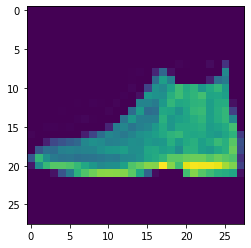

In [28]:
plt.imshow(test_images[0])

## Exercise 2:

In [29]:
from keras.datasets import fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fashion_mnist.load_data()

In [30]:
### Normalize the image
training_images = training_images / 255.0
test_images = test_images / 255.0

In [31]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [32]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4773
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3609
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3237
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2997
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2809


In [33]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 924us/step - loss: 0.3492


0.3492380976676941

In [37]:
classifications = model.predict(test_images)
print("model has 10 predict: ")
print(classifications[0])
print(f"With the highest probability is {max(classifications[0])} \nwhich stand for class \n{np.argmax(classifications[0])}")
print("actual it is")
print(test_labels[0])

model has 10 predict: 
[1.2041242e-07 9.9212247e-09 5.3416964e-09 9.6654444e-09 9.0305221e-08 8.2074769e-04 3.5725029e-07 4.0261175e-02 5.6595303e-07 9.5891690e-01]
With the highest probability is 0.9589169025421143 
which stand for class 
9
actual it is
9


## Exercise 8

In [38]:
from keras.callbacks import Callback

class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.6 :
            print("\n Reach 60% accuracy so cancelling training")
            self.model.stop_training = True

In [39]:
callbacks = MyCallback()

In [40]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(training_images, training_labels, epochs=500, callbacks=callbacks)

Epoch 1/500
1871/1875 [============================>.] - ETA: 0s - loss: 0.4756 - accuracy: 0.8306
 Reach 60% accuracy so cancelling training
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4755 - accuracy: 0.8306
